<a href="https://colab.research.google.com/github/mingmingbupt/tensorflow/blob/master/tf_keras_regression_customized_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.2.0-rc1
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.2
pandas 0.25.3
sklearn 0.22.2.post1
tensorflow 2.2.0-rc1
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [4]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [5]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [7]:
#自己定义损失函数，输入有两个，一个是真实值，一个是预测值
def customized_mse(y_true, y_pred):
    # mse 差的平方再求均值
    return tf.reduce_mean(tf.square(y_pred - y_true))
    # 其中tf.reduce_mean求均值

model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',
                       input_shape=x_train.shape[1:]),
    keras.layers.Dense(1),
])
model.summary()

# 在我们之前的损失函数里，我们使用的是系统预定义的mean-square-error,也就是均方差，下面我们自己实现下均方差，
# 将"mean-square-error" 替换成 customized_mse
model.compile(loss=customized_mse, optimizer="sgd",
              metrics=["mean_squared_error"])
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.8457 - mean_squared_error: 0.8459 - val_loss: 0.5822 - val_mean_squared_error: 0.5822
Epoch 2/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5235 - mean_squared_error: 0.5236 - val_loss: 0.4953 - val_mean_squared_error: 0.4954
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4567 - mean_squared_error: 0.4567 - val_loss: 0.4647 - val_mean_squared_error: 0.4648
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4324 - mean_squared_error: 0.4324 - val_loss: 0.4415 - val_mean_squared_error: 0.4416
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4178 - mean_squared_error: 0.4178 - val_loss: 0.4315 - val_mean_squared_error: 0.4316
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4180 - mean_squared_error: 0.4179 - val_loss: 0.4254 - val_mean_squared_error: 0.4254
Epoch 7/100
363/363 [=

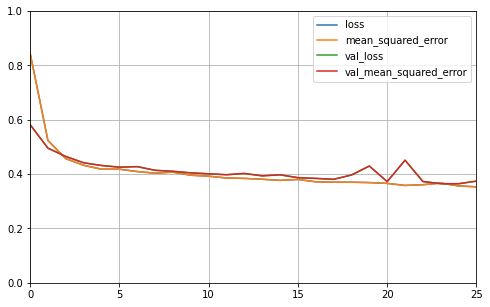

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [10]:
model.evaluate(x_test_scaled, y_test)

162/162 [==============================] - 0s 987us/step - loss: 0.3977 - mean_squared_error: 0.3966


[0.3977348506450653, 0.3966308832168579]